# Dataset Analysis

In [72]:
import pandas as pd
import os
from handwriting_recognition.utils import get_dataset_folder_path

path_to_data = get_dataset_folder_path()
path_to_tr = os.path.join(path_to_data, 'pre_processed/train.csv')
path_to_ts = os.path.join(path_to_data, 'pre_processed/test.csv')
path_to_val = os.path.join(path_to_data, 'pre_processed/validation.csv')
print(path_to_tr)
print(path_to_ts)
print(path_to_val)

C:\Users\User\Desktop\handwriting-recognition\dataset\pre_processed/train.csv
C:\Users\User\Desktop\handwriting-recognition\dataset\pre_processed/test.csv
C:\Users\User\Desktop\handwriting-recognition\dataset\pre_processed/validation.csv


In [73]:
tr = pd.read_csv(path_to_tr)
ts = pd.read_csv(path_to_ts)
val = pd.read_csv(path_to_val)
print(tr.shape)
print(ts.shape)
print(val.shape)

(318788, 3)
(39854, 3)
(39886, 3)


In [74]:
df = pd.concat([tr,val,ts])
df.head()

,file_name,label,file_path
0,TRAIN_00001.tiff,balthazar,C:\Users\User\Desktop\handwriting-recognition\...
1,TRAIN_00002.tiff,simon,C:\Users\User\Desktop\handwriting-recognition\...
2,TRAIN_00003.tiff,benes,C:\Users\User\Desktop\handwriting-recognition\...
3,TRAIN_00004.tiff,la love,C:\Users\User\Desktop\handwriting-recognition\...
4,TRAIN_00005.tiff,daphne,C:\Users\User\Desktop\handwriting-recognition\...


In [75]:
df.describe()

,file_name,label,file_path
count,398528,398528,398528
unique,398528,116142,398528
top,TRAIN_00001.tiff,thomas,C:\Users\User\Desktop\handwriting-recognition\...
freq,1,2271,1


In [76]:
all_names = ''.join(df['label']) # put all names into single string
all_names[0:100]

'balthazarsimonbenesla lovedaphnelucienassimassraouilavianmaevaemmamoulinierelisehonnertmatheopetitdi'

In [77]:
from collections import Counter
char_freq = Counter(all_names)
char_freq

Counter({'a': 331273,
         'e': 329779,
         'i': 216626,
         'n': 207405,
         'l': 196844,
         'r': 184735,
         'o': 165105,
         't': 123080,
         'u': 118868,
         's': 113436,
         'm': 100674,
         'c': 84836,
         'h': 76789,
         'd': 75214,
         'b': 57008,
         'g': 48506,
         'y': 35300,
         'p': 34498,
         'v': 30293,
         'f': 22752,
         ' ': 21393,
         'j': 19658,
         'k': 17497,
         'z': 16934,
         'x': 14009,
         'w': 6814,
         'q': 6430})

In [78]:
sorted_char_freq = sorted(char_freq.items(), key=lambda item_tuple: item_tuple[1], reverse=False) # parse tuples and sort via the key, which is the count.
sorted_char_freq[0:5]

[('q', 6430), ('w', 6814), ('x', 14009), ('z', 16934), ('k', 17497)]

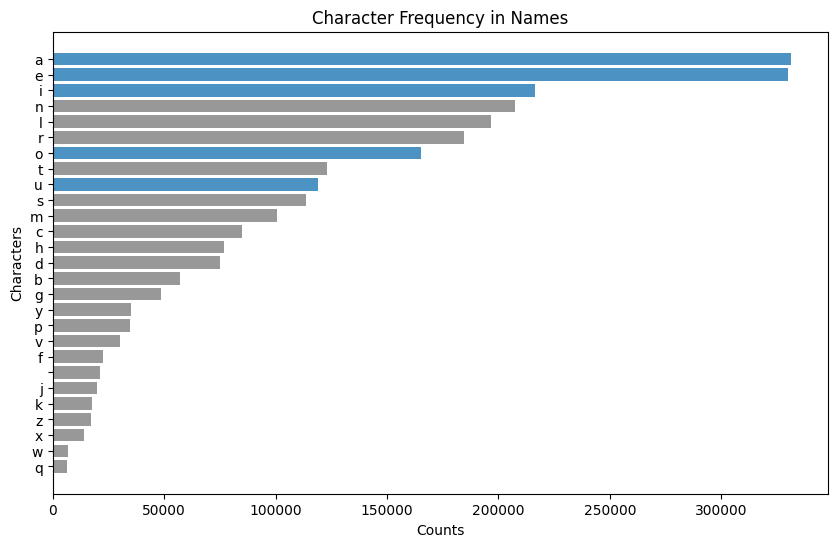

In [79]:
import matplotlib.pyplot as plt

sorted_char_freq = dict(sorted_char_freq) # formatted for plotting
characters = list(sorted_char_freq.keys())
character_counts = list(sorted_char_freq.values())

colours = ['C7'] * len(characters)

for vowel in 'aeiou':    
  highlighted_bar_index = characters.index(vowel) # The bar's index that we want to change colour.
  colours[highlighted_bar_index] = 'C0'

plt.figure(figsize=(10, 6))
# plt.barh(characters, character_counts, color='C0', alpha=0.8)
plt.barh(characters, character_counts, color=colours, alpha=0.8, )
plt.xlabel('Counts')
plt.ylabel('Characters')
plt.title('Character Frequency in Names')
plt.show()


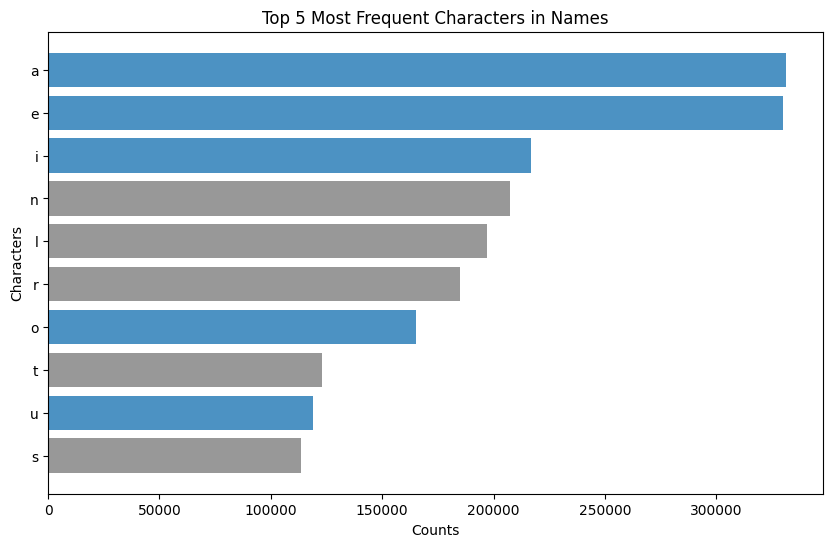

In [80]:
import matplotlib.pyplot as plt

sorted_char_freq = dict(sorted_char_freq) # formatted for plotting
characters = list(sorted_char_freq.keys())
character_counts = list(sorted_char_freq.values())

colours = ['C7'] * len(characters)

for vowel in 'aeiou':    
  highlighted_bar_index = characters.index(vowel) # The bar's index that we want to change colour.
  colours[highlighted_bar_index] = 'C0'

plt.figure(figsize=(10, 6))
# plt.barh(characters, character_counts, color='C0', alpha=0.8)
plt.barh(characters[-10:], character_counts[-10:], color=colours[-10:], alpha=0.8, )
plt.xlabel('Counts')
plt.ylabel('Characters')
plt.title('Top 5 Most Frequent Characters in Names')
plt.show()


# Find if there is a missing characters in the dataset

In [81]:
import string

all_possible_char = set(string.ascii_lowercase) # Note: punctuation could be added... or special accent characters.
uniq_char_in_all_names = set(all_names)
print(all_possible_char)
print(uniq_char_in_all_names)

{'a', 'q', 'g', 'l', 'u', 'm', 'e', 's', 'd', 't', 'c', 'r', 'n', 'h', 'f', 'p', 'b', 'k', 'y', 'z', 'j', 'v', 'o', 'i', 'w', 'x'}
{'a', 'q', 'g', 'l', 'u', 'm', 'e', 's', 'd', 't', 'c', 'r', 'n', 'h', ' ', 'p', 'b', 'f', 'y', 'k', 'z', 'v', 'j', 'o', 'i', 'w', 'x'}


In [82]:
# Do the difference between two sets
char_unrepresented = all_possible_char - uniq_char_in_all_names
print('Here is all the characters not represented in the dataset:', char_unrepresented)

Here is all the characters not represented in the dataset: set()


# Find what is the character length distribution of dataset

In [83]:
df['lengths'] = df['label'].apply(len)
sdf = df[['label','lengths']]
sdf.head()

,label,lengths
0,balthazar,9
1,simon,5
2,benes,5
3,la love,7
4,daphne,6


In [84]:
# longest names
sdf.sort_values(['lengths'],ascending=False)[0:5]

,label,lengths
24593,chassigneux champon,19
256664,narbai is sauregu,19
138545,capsalas plancher,19
264295,pinard bertelettc,19
173475,alvarez de sotomayc,19


date of naissance classe is French for date of birth class

In [85]:
from IPython.display import Image as show_im
df.sort_values(['lengths'],ascending=False)[0:5]

,file_name,label,file_path,lengths
24593,TRAIN_25533.tiff,chassigneux champon,C:\Users\User\Desktop\handwriting-recognition\...,19
256664,TRAIN_266468.tiff,narbai is sauregu,C:\Users\User\Desktop\handwriting-recognition\...,19
138545,TRAIN_143934.tiff,capsalas plancher,C:\Users\User\Desktop\handwriting-recognition\...,19
264295,TRAIN_274389.tiff,pinard bertelettc,C:\Users\User\Desktop\handwriting-recognition\...,19
173475,TRAIN_180112.tiff,alvarez de sotomayc,C:\Users\User\Desktop\handwriting-recognition\...,19


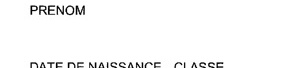

In [86]:
show_im(get_dataset_folder_path() / "raw" / "test" / "TEST_5222.jpg")

In [87]:
# shortist names
sdf.sort_values(['lengths'],ascending=False)[-6:-1]

,label,lengths
83968,lara,4
298648,theo,4
264024,mbae,4
176917,ryan,4
15767,liam,4


In [88]:
df.sort_values(['lengths'],ascending=False)[-6:-1]

,file_name,label,file_path,lengths
83968,TRAIN_87205.tiff,lara,C:\Users\User\Desktop\handwriting-recognition\...,4
298648,TRAIN_310057.tiff,theo,C:\Users\User\Desktop\handwriting-recognition\...,4
264024,TRAIN_274112.tiff,mbae,C:\Users\User\Desktop\handwriting-recognition\...,4
176917,TRAIN_183676.tiff,ryan,C:\Users\User\Desktop\handwriting-recognition\...,4
15767,VALIDATION_16388.tiff,liam,C:\Users\User\Desktop\handwriting-recognition\...,4


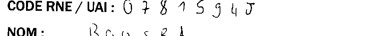

In [89]:
from IPython.display import Image as show_im
show_im(get_dataset_folder_path() / "raw" / "test" / "TEST_8807.jpg")

In [90]:
sdf['lengths'].describe()

count    398528.000000
mean          6.663913
std           2.056495
min           4.000000
25%           5.000000
50%           6.000000
75%           8.000000
max          19.000000
Name: lengths, dtype: float64

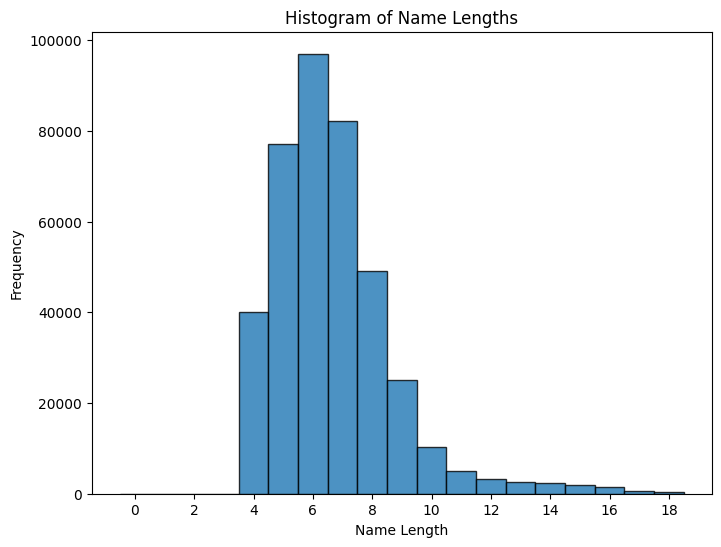

In [91]:
plt.figure(figsize=(8, 6))
plt.hist(sdf['lengths'], bins=range(0, max(sdf['lengths']) + 1), color='C0', edgecolor='black', alpha=0.8)
plt.xlabel('Name Length')
plt.xticks([x + 0.5 for x in range(max(sdf['lengths']) + 1) if x % 2 == 0], [x for x in range(max(sdf['lengths']) + 1) if x % 2 == 0])
plt.ylabel('Frequency')
plt.title('Histogram of Name Lengths')
# plt.grid(True)
plt.show()

# Find the most frequent names in the list

In [92]:
name_freq = sdf['label'].value_counts()
print(name_freq[0:5])
print(name_freq[-6:-1])

label
thomas     2271
emma       1870
lucas      1851
camille    1722
hugo       1715
Name: count, dtype: int64
label
satyne            1
chatalic          1
hemme             1
toulier ancian    1
tramble           1
Name: count, dtype: int64


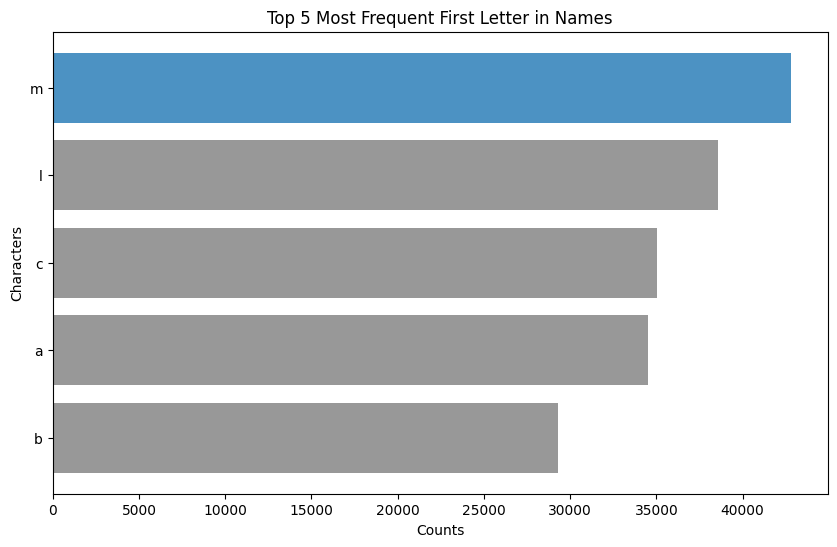

In [93]:
all_names = ''.join(df['label'].map(lambda x: x[0])) # put all names into single string
char_freq = Counter(all_names)
sorted_char_freq = sorted(char_freq.items(), key=lambda item_tuple: item_tuple[1], reverse=False) # parse tuples and sort via the key, which is the count.

import matplotlib.pyplot as plt

sorted_char_freq = dict(sorted_char_freq) # formatted for plotting
characters = list(sorted_char_freq.keys())
character_counts = list(sorted_char_freq.values())

colours = ['C7'] * len(characters)

for vowel in 'm':    
  highlighted_bar_index = characters.index(vowel) # The bar's index that we want to change colour.
  colours[highlighted_bar_index] = 'C0'

plt.figure(figsize=(10, 6))
# plt.barh(characters, character_counts, color='C0', alpha=0.8)
plt.barh(characters[-5:], character_counts[-5:], color=colours[-5:], alpha=0.8, )
plt.xlabel('Counts')
plt.ylabel('Characters')
plt.title('Top 5 Most Frequent First Letter in Names')
plt.show()